In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pickle

from pathlib import Path
from tqdm.auto import tqdm

In [2]:
import sys
sys.path.append('..')

In [3]:
from lib.models import HMM, HMMFilter
from lib.policies import StaticRoutingPolicy, MinimalDelayRoutingPolicy
from lib.policies import StaticMonitoringPolicy, RecedingHorizonPolicy
from lib.simulator import Scenario, Simulator

In [4]:
# scenarios_dir = Path('../dataset/NLNOG/scenarios_v2/2_paths/')
# scenarios_paths = [x for x in scenarios_dir.iterdir() if x.is_dir()]

In [5]:
olivier_scenarios = [
    '2_paths/',
#     '3_paths/Singapore_HongKong',
#     '4_paths/Haifa_Santiago',
#     '4_paths/Paris_Santiago'
]


scenarios_dir = Path('../dataset/NLNOG/scenarios_v2/')
scenarios_paths = [scenarios_dir.joinpath(x) for x in olivier_scenarios]

In [6]:
scenarios_dir = Path('../dataset/NLNOG/scenarios_v2/2_paths/')
scenarios_paths = [x for x in scenarios_dir.iterdir() if x.is_dir()]

In [7]:
benchmarks = {}

# Progress bar
p = tqdm(scenarios_paths)

series_temp={}
for scenario_path in p:
    if scenario_path!='.ipynb_checkpoints':
        scenario = Scenario.from_path(scenario_path)
        # en scenario.timeseries tengo las series temporales para cada ruta
        series_temp[scenario.name]=scenario.timeseries
        print(scenario)

Haifa_Paris scenario with 2 paths
- K = [4, 3]
- Avg. delays = [102.7, 85.63]
Melbourne_Paris scenario with 2 paths
- K = [3, 5]
- Avg. delays = [312.11, 276.21]
San_Francisco_Paris scenario with 2 paths
- K = [6, 5]
- Avg. delays = [174.09, 174.31]
Cocoa_Moscow scenario with 2 paths
- K = [6, 3]
- Avg. delays = [157.34, 144.64]
Curitiba_Paris scenario with 2 paths
- K = [4, 3]
- Avg. delays = [269.93, 219.7]
Houston_HongKong scenario with 2 paths
- K = [4, 5]
- Avg. delays = [202.18, 200.07]
Paris_San_Francisco scenario with 2 paths
- K = [6, 7]
- Avg. delays = [174.09, 174.27]
Dublin_San_Francisco scenario with 2 paths
- K = [7, 5]
- Avg. delays = [156.42, 152.48]
Narita_San_Francisco scenario with 2 paths
- K = [4, 1]
- Avg. delays = [112.96, 111.74]
Narita_Singapore scenario with 2 paths
- K = [6, 5]
- Avg. delays = [84.28, 81.39]
Calgary_Singapore scenario with 2 paths
- K = [2, 5]
- Avg. delays = [215.03, 186.22]
Tokyo_Melbourne scenario with 2 paths
- K = [2, 4]
- Avg. delays = 

In [8]:
# Calgary_Singapore scenario with 2 paths
# - K = [2, 5]
# - Avg. delays = [215.03, 186.22]
# Tokyo_Melbourne scenario with 2 paths
# - K = [2, 4]

In [9]:
benchmarks = {}

# Progress bar
p = tqdm(scenarios_paths)

series_temp={}
for scenario_path in p:
    if scenario_path!='.ipynb_checkpoints':
        scenario = Scenario.from_path(scenario_path)
        # en scenario.timeseries tengo las series temporales para cada ruta
        series_temp[scenario.name]=scenario.timeseries
        print(scenario.timeseries[0])
        benchmark = {'logs': {}}

        # Constant monitoring cost
        costs = np.ones(scenario.n_paths) * 0.5

        # (Routing Policy, Monitoring Policy)
        policies = []

        # IP Path
        policies.append((
            StaticRoutingPolicy(0),
            StaticMonitoringPolicy(np.zeros(scenario.n_paths))
        ))

        # Receding Horizon
        policies.append((
            MinimalDelayRoutingPolicy(),
            RecedingHorizonPolicy(scenario.models, costs, τ_max=100, ρ=0.99, H=1, one_route=False)
        ))

        for routing_policy, monitoring_policy in policies:
            policy_name = '{} / {}'.format(routing_policy, monitoring_policy)
            p.set_description('{} ({})'.format(scenario.name, policy_name))

            try:
                sim = Simulator(scenario.timeseries, scenario.models, costs)
                print(sim.timeseries)
                benchmark['logs'][policy_name] = sim.benchmark(monitoring_policy, routing_policy)
            except Exception as e:
                print('Failed to simulate {}'.format(policy_name))
                print(e)

        benchmarks[scenario.name] = benchmark


[101.695 101.617 101.692 ... 103.989 104.01  103.986]
[array([101.695, 101.617, 101.692, ..., 103.989, 104.01 , 103.986]), array([85.516, 85.57 , 85.54 , ..., 85.423, 85.47 , 85.794])]


[array([101.695, 101.617, 101.692, ..., 103.989, 104.01 , 103.986]), array([85.516, 85.57 , 85.54 , ..., 85.423, 85.47 , 85.794])]


[311.909 311.905 311.871 ... 311.861 311.847 311.867]
[array([311.909, 311.905, 311.871, ..., 311.861, 311.847, 311.867]), array([292.631, 294.226, 318.719, ..., 269.136, 268.605, 269.213])]


[array([311.909, 311.905, 311.871, ..., 311.861, 311.847, 311.867]), array([292.631, 294.226, 318.719, ..., 269.136, 268.605, 269.213])]


[176.133 177.556 174.312 ... 174.49  172.93  173.041]
[array([176.133, 177.556, 174.312, ..., 174.49 , 172.93 , 173.041]), array([173.463, 173.583, 173.621, ..., 173.726, 173.747, 174.012])]


[array([176.133, 177.556, 174.312, ..., 174.49 , 172.93 , 173.041]), array([173.463, 173.583, 173.621, ..., 173.726, 173.747, 174.012])]


[156.677 156.785 156.552 ... 156.059 155.997 156.081]
[array([156.677, 156.785, 156.552, ..., 156.059, 155.997, 156.081]), array([143.619, 143.875, 143.501, ..., 145.202, 145.396, 145.599])]


[array([156.677, 156.785, 156.552, ..., 156.059, 155.997, 156.081]), array([143.619, 143.875, 143.501, ..., 145.202, 145.396, 145.599])]


[265.551 265.611 265.936 ... 265.245 265.222 265.217]
[array([265.551, 265.611, 265.936, ..., 265.245, 265.222, 265.217]), array([218.502, 217.802, 217.784, ..., 217.797, 218.474, 218.082])]


[array([265.551, 265.611, 265.936, ..., 265.245, 265.222, 265.217]), array([218.502, 217.802, 217.784, ..., 217.797, 218.474, 218.082])]


[201.576 202.26  201.486 ... 200.933 202.96  201.258]
[array([201.576, 202.26 , 201.486, ..., 200.933, 202.96 , 201.258]), array([199.157, 196.396, 197.836, ..., 195.25 , 197.134, 195.194])]


[array([201.576, 202.26 , 201.486, ..., 200.933, 202.96 , 201.258]), array([199.157, 196.396, 197.836, ..., 195.25 , 197.134, 195.194])]


[174.356 176.268 177.524 ... 172.618 174.373 172.756]
[array([174.356, 176.268, 177.524, ..., 172.618, 174.373, 172.756]), array([173.571, 173.598, 173.523, ..., 173.678, 173.652, 173.658])]


[array([174.356, 176.268, 177.524, ..., 172.618, 174.373, 172.756]), array([173.571, 173.598, 173.523, ..., 173.678, 173.652, 173.658])]


[155.773 155.823 155.692 ... 155.823 155.818 155.807]
[array([155.773, 155.823, 155.692, ..., 155.823, 155.818, 155.807]), array([151.619, 152.44 , 151.336, ..., 152.461, 152.243, 152.401])]


[array([155.773, 155.823, 155.692, ..., 155.823, 155.818, 155.807]), array([151.619, 152.44 , 151.336, ..., 152.461, 152.243, 152.401])]


[111.714 110.275 109.527 ... 114.379 111.779 112.105]
[array([111.714, 110.275, 109.527, ..., 114.379, 111.779, 112.105]), array([111.1  , 111.175, 111.096, ..., 111.942, 111.586, 111.943])]


[array([111.714, 110.275, 109.527, ..., 114.379, 111.779, 112.105]), array([111.1  , 111.175, 111.096, ..., 111.942, 111.586, 111.943])]


[80.227 81.368 80.405 ... 88.57  87.626 88.515]
[array([80.227, 81.368, 80.405, ..., 88.57 , 87.626, 88.515]), array([ 98.141,  99.171, 123.449, ...,  74.607,  74.174,  74.129])]


[array([80.227, 81.368, 80.405, ..., 88.57 , 87.626, 88.515]), array([ 98.141,  99.171, 123.449, ...,  74.607,  74.174,  74.129])]


[216.686 216.696 216.668 ... 230.635 230.623 230.658]
[array([216.686, 216.696, 216.668, ..., 230.635, 230.623, 230.658]), array([203.703, 204.401, 228.911, ..., 179.146, 180.857, 178.797])]


[array([216.686, 216.696, 216.668, ..., 230.635, 230.623, 230.658]), array([203.703, 204.401, 228.911, ..., 179.146, 180.857, 178.797])]


[197.522 200.391 198.258 ... 198.094 199.577 197.478]
[array([197.522, 200.391, 198.258, ..., 198.094, 199.577, 197.478]), array([143.722, 141.44 , 144.729, ..., 144.018, 144.257, 142.039])]


[array([197.522, 200.391, 198.258, ..., 198.094, 199.577, 197.478]), array([143.722, 141.44 , 144.729, ..., 144.018, 144.257, 142.039])]


[208.439 208.469 209.375 ... 203.188 202.282 202.277]
[array([208.439, 208.469, 209.375, ..., 203.188, 202.282, 202.277]), array([185.315, 189.022, 213.424, ..., 147.387, 147.517, 146.987])]


[array([208.439, 208.469, 209.375, ..., 203.188, 202.282, 202.277]), array([185.315, 189.022, 213.424, ..., 147.387, 147.517, 146.987])]


[180.875 180.878 180.884 ... 181.778 181.79  181.812]
[array([180.875, 180.878, 180.884, ..., 181.778, 181.79 , 181.812]), array([182.917, 182.958, 182.703, ..., 184.458, 184.991, 184.689])]


[array([180.875, 180.878, 180.884, ..., 181.778, 181.79 , 181.812]), array([182.917, 182.958, 182.703, ..., 184.458, 184.991, 184.689])]


[178.002 177.67  177.687 ... 178.167 178.349 178.028]
[array([178.002, 177.67 , 177.687, ..., 178.167, 178.349, 178.028]), array([177.327, 177.306, 177.365, ..., 178.23 , 178.367, 178.214])]


[array([178.002, 177.67 , 177.687, ..., 178.167, 178.349, 178.028]), array([177.327, 177.306, 177.365, ..., 178.23 , 178.367, 178.214])]


[323.44  323.357 323.439 ... 323.364 323.315 323.443]
[array([323.44 , 323.357, 323.439, ..., 323.364, 323.315, 323.443]), array([318.843, 319.872, 318.643, ..., 318.74 , 318.945, 318.983])]


[array([323.44 , 323.357, 323.439, ..., 323.364, 323.315, 323.443]), array([318.843, 319.872, 318.643, ..., 318.74 , 318.945, 318.983])]


[163.737 163.839 163.781 ... 164.842 164.096 164.225]
[array([163.737, 163.839, 163.781, ..., 164.842, 164.096, 164.225]), array([144.604, 144.719, 144.666, ..., 145.46 , 144.853, 145.223])]


[array([163.737, 163.839, 163.781, ..., 164.842, 164.096, 164.225]), array([144.604, 144.719, 144.666, ..., 145.46 , 144.853, 145.223])]


[171.233 171.157 171.08  ... 171.012 171.083 171.138]
[array([171.233, 171.157, 171.08 , ..., 171.012, 171.083, 171.138]), array([164.387, 164.054, 164.384, ..., 164.111, 165.69 , 164.074])]


[array([171.233, 171.157, 171.08 , ..., 171.012, 171.083, 171.138]), array([164.387, 164.054, 164.384, ..., 164.111, 165.69 , 164.074])]


[101.714 101.653 101.62  ... 103.951 103.946 103.962]
[array([101.714, 101.653, 101.62 , ..., 103.951, 103.946, 103.962]), array([85.475, 85.414, 85.567, ..., 85.574, 85.506, 85.699])]


[array([101.714, 101.653, 101.62 , ..., 103.951, 103.946, 103.962]), array([85.475, 85.414, 85.567, ..., 85.574, 85.506, 85.699])]


[175.947 175.88  175.999 ... 175.979 176.43  175.954]
[array([175.947, 175.88 , 175.999, ..., 175.979, 176.43 , 175.954]), array([145.939, 145.891, 145.768, ..., 185.02 , 185.756, 186.082])]


[array([175.947, 175.88 , 175.999, ..., 175.979, 176.43 , 175.954]), array([145.939, 145.891, 145.768, ..., 185.02 , 185.756, 186.082])]


[154.672 153.596 154.438 ... 156.816 156.843 157.475]
[array([154.672, 153.596, 154.438, ..., 156.816, 156.843, 157.475]), array([95.67 , 95.788, 95.326, ..., 95.864, 96.689, 96.68 ])]


[array([154.672, 153.596, 154.438, ..., 156.816, 156.843, 157.475]), array([95.67 , 95.788, 95.326, ..., 95.864, 96.689, 96.68 ])]


[243.194 243.044 242.962 ... 274.221 274.1   274.367]
[array([243.194, 243.044, 242.962, ..., 274.221, 274.1  , 274.367]), array([233.447, 233.614, 233.23 , ..., 272.99 , 277.316, 272.079])]


[array([243.194, 243.044, 242.962, ..., 274.221, 274.1  , 274.367]), array([233.447, 233.614, 233.23 , ..., 272.99 , 277.316, 272.079])]


[232.876 232.854 232.899 ... 229.012 228.897 229.032]
[array([232.876, 232.854, 232.899, ..., 229.012, 228.897, 229.032]), array([231.161, 230.769, 230.356, ..., 233.192, 233.196, 233.276])]


[array([232.876, 232.854, 232.899, ..., 229.012, 228.897, 229.032]), array([231.161, 230.769, 230.356, ..., 233.192, 233.196, 233.276])]


[178.14  178.05  178.07  ... 163.243 163.263 163.209]
[array([178.14 , 178.05 , 178.07 , ..., 163.243, 163.263, 163.209]), array([169.501, 169.842, 169.592, ..., 208.756, 209.344, 209.249])]


[array([178.14 , 178.05 , 178.07 , ..., 163.243, 163.263, 163.209]), array([169.501, 169.842, 169.592, ..., 208.756, 209.344, 209.249])]


[208.232 208.23  208.259 ... 209.514 209.542 209.537]
[array([208.232, 208.23 , 208.259, ..., 209.514, 209.542, 209.537]), array([162.718, 163.626, 162.393, ..., 162.427, 162.421, 162.537])]


[array([208.232, 208.23 , 208.259, ..., 209.514, 209.542, 209.537]), array([162.718, 163.626, 162.393, ..., 162.427, 162.421, 162.537])]


[249.121 249.061 249.072 ... 247.613 247.601 247.675]
[array([249.121, 249.061, 249.072, ..., 247.613, 247.601, 247.675]), array([247.214, 246.946, 247.162, ..., 248.791, 250.347, 248.803])]


[array([249.121, 249.061, 249.072, ..., 247.613, 247.601, 247.675]), array([247.214, 246.946, 247.162, ..., 248.791, 250.347, 248.803])]


[177.995 177.751 177.597 ... 178.152 177.965 178.117]
[array([177.995, 177.751, 177.597, ..., 178.152, 177.965, 178.117]), array([177.669, 177.546, 177.418, ..., 177.588, 178.076, 177.991])]


[array([177.995, 177.751, 177.597, ..., 178.152, 177.965, 178.117]), array([177.669, 177.546, 177.418, ..., 177.588, 178.076, 177.991])]


[291.456 295.14  291.956 ... 290.73  291.316 294.231]
[array([291.456, 295.14 , 291.956, ..., 290.73 , 291.316, 294.231]), array([304.241, 303.242, 304.77 , ..., 287.711, 288.579, 287.764])]


[array([291.456, 295.14 , 291.956, ..., 290.73 , 291.316, 294.231]), array([304.241, 303.242, 304.77 , ..., 287.711, 288.579, 287.764])]


[137.166 137.347 137.398 ... 136.406 136.066 136.401]
[array([137.166, 137.347, 137.398, ..., 136.406, 136.066, 136.401]), array([126.54 , 126.823, 127.81 , ..., 126.845, 127.075, 127.299])]


[array([137.166, 137.347, 137.398, ..., 136.406, 136.066, 136.401]), array([126.54 , 126.823, 127.81 , ..., 126.845, 127.075, 127.299])]


[201.374 200.98  200.932 ... 201.828 201.018 201.577]
[array([201.374, 200.98 , 200.932, ..., 201.828, 201.018, 201.577]), array([197.25 , 201.157, 201.171, ..., 196.185, 200.869, 202.79 ])]


[array([201.374, 200.98 , 200.932, ..., 201.828, 201.018, 201.577]), array([197.25 , 201.157, 201.171, ..., 196.185, 200.869, 202.79 ])]


[161.324 161.316 161.309 ... 161.328 161.317 161.368]
[array([161.324, 161.316, 161.309, ..., 161.328, 161.317, 161.368]), array([137.511, 138.522, 137.292, ..., 137.391, 137.348, 137.451])]


[array([161.324, 161.316, 161.309, ..., 161.328, 161.317, 161.368]), array([137.511, 138.522, 137.292, ..., 137.391, 137.348, 137.451])]


[189.69  189.097 189.202 ... 188.344 188.334 188.306]
[array([189.69 , 189.097, 189.202, ..., 188.344, 188.334, 188.306]), array([203.035, 204.118, 228.462, ..., 178.752, 179.101, 179.855])]


Failed to simulate Static Route 0 / Never Measure
Failed in nopython mode pipeline (step: nopython frontend)
Invalid use of Function(<built-in function matmul>) with argument(s) of type(s): (array(float64, 2d, F), array(complex128, 1d, C))
 * parameterized
In definition 0:
    TypingError: '@' arguments must all have the same dtype
    raised from /home/marten/.local/share/virtualenvs/INFOCOM2020-master-ZAQXgKmv/lib/python3.7/site-packages/numba/typing/npydecl.py:970
In definition 1:
    TypingError: '@' arguments must all have the same dtype
    raised from /home/marten/.local/share/virtualenvs/INFOCOM2020-master-ZAQXgKmv/lib/python3.7/site-packages/numba/typing/npydecl.py:970
This error is usually caused by passing an argument of a type that is unsupported by the named function.
[1] During: typing of intrinsic-call at ../lib/jit.py (42)

File "../lib/jit.py", line 42:
def jit_hmm_predict(transmat, belief):
    return transmat.T @ belief
    ^

This is not usually a problem with Numba

Failed to simulate Minimal Delay / RH(ρ=0.99,H=1)
Failed in nopython mode pipeline (step: nopython frontend)
Invalid use of Function(<built-in function matmul>) with argument(s) of type(s): (array(float64, 2d, F), array(complex128, 1d, C))
 * parameterized
In definition 0:
    TypingError: '@' arguments must all have the same dtype
    raised from /home/marten/.local/share/virtualenvs/INFOCOM2020-master-ZAQXgKmv/lib/python3.7/site-packages/numba/typing/npydecl.py:970
In definition 1:
    TypingError: '@' arguments must all have the same dtype
    raised from /home/marten/.local/share/virtualenvs/INFOCOM2020-master-ZAQXgKmv/lib/python3.7/site-packages/numba/typing/npydecl.py:970
This error is usually caused by passing an argument of a type that is unsupported by the named function.
[1] During: typing of intrinsic-call at ../lib/jit.py (42)

File "../lib/jit.py", line 42:
def jit_hmm_predict(transmat, belief):
    return transmat.T @ belief
    ^

This is not usually a problem with Numba

[array([244.928, 244.05 , 244.157, ..., 244.599, 244.696, 244.65 ]), array([227.733, 227.469, 226.231, ..., 227.582, 227.917, 227.599])]


[265.568 265.233 265.628 ... 265.189 265.18  265.193]
[array([265.568, 265.233, 265.628, ..., 265.189, 265.18 , 265.193]), array([217.7  , 217.748, 217.775, ..., 217.898, 217.774, 217.843])]


[array([265.568, 265.233, 265.628, ..., 265.189, 265.18 , 265.193]), array([217.7  , 217.748, 217.775, ..., 217.898, 217.774, 217.843])]


[197.529 198.134 198.355 ... 198.283 197.594 198.712]
[array([197.529, 198.134, 198.355, ..., 198.283, 197.594, 198.712]), array([142.023, 143.34 , 142.99 , ..., 144.919, 141.527, 144.681])]


[array([197.529, 198.134, 198.355, ..., 198.283, 197.594, 198.712]), array([142.023, 143.34 , 142.99 , ..., 144.919, 141.527, 144.681])]


[182.141 182.187 182.154 ... 183.1   183.095 183.146]
[array([182.141, 182.187, 182.154, ..., 183.1  , 183.095, 183.146]), array([142.407, 143.409, 142.197, ..., 146.238, 146.212, 146.276])]


[array([182.141, 182.187, 182.154, ..., 183.1  , 183.095, 183.146]), array([142.407, 143.409, 142.197, ..., 146.238, 146.212, 146.276])]


[294.923 295.011 293.418 ... 292.71  292.977 292.911]
[array([294.923, 295.011, 293.418, ..., 292.71 , 292.977, 292.911]), array([292.424, 292.434, 293.231, ..., 288.436, 287.477, 287.457])]


[array([294.923, 295.011, 293.418, ..., 292.71 , 292.977, 292.911]), array([292.424, 292.434, 293.231, ..., 288.436, 287.477, 287.457])]


[57.592 54.756 56.255 ... 53.544 55.444 53.599]
[array([57.592, 54.756, 56.255, ..., 53.544, 55.444, 53.599]), array([56.798, 58.435, 55.284, ..., 57.783, 56.407, 54.918])]


[array([57.592, 54.756, 56.255, ..., 53.544, 55.444, 53.599]), array([56.798, 58.435, 55.284, ..., 57.783, 56.407, 54.918])]


[148.844 147.941 147.159 ... 147.85  148.16  147.822]
[array([148.844, 147.941, 147.159, ..., 147.85 , 148.16 , 147.822]), array([163.489, 163.734, 163.78 , ..., 206.439, 206.805, 206.4  ])]


[array([148.844, 147.941, 147.159, ..., 147.85 , 148.16 , 147.822]), array([163.489, 163.734, 163.78 , ..., 206.439, 206.805, 206.4  ])]


[258.022 260.536 258.254 ... 253.816 254.31  259.423]
[array([258.022, 260.536, 258.254, ..., 253.816, 254.31 , 259.423]), array([169.501, 169.842, 169.592, ..., 208.756, 209.344, 209.249])]


[array([258.022, 260.536, 258.254, ..., 253.816, 254.31 , 259.423]), array([169.501, 169.842, 169.592, ..., 208.756, 209.344, 209.249])]


[123.646 123.408 123.441 ... 124.441 124.402 124.348]
[array([123.646, 123.408, 123.441, ..., 124.441, 124.402, 124.348]), array([107.065, 107.399, 107.139, ..., 111.363, 111.658, 111.826])]


[array([123.646, 123.408, 123.441, ..., 124.441, 124.402, 124.348]), array([107.065, 107.399, 107.139, ..., 111.363, 111.658, 111.826])]


[122.541 122.567 122.573 ... 122.644 122.801 122.994]
[array([122.541, 122.567, 122.573, ..., 122.644, 122.801, 122.994]), array([113.749, 114.014, 113.747, ..., 113.947, 114.188, 114.419])]


[array([122.541, 122.567, 122.573, ..., 122.644, 122.801, 122.994]), array([113.749, 114.014, 113.747, ..., 113.947, 114.188, 114.419])]


[134.452 133.752 134.026 ... 136.25  136.156 135.914]
[array([134.452, 133.752, 134.026, ..., 136.25 , 136.156, 135.914]), array([122.085, 122.391, 122.149, ..., 123.774, 124.018, 124.145])]


[array([134.452, 133.752, 134.026, ..., 136.25 , 136.156, 135.914]), array([122.085, 122.391, 122.149, ..., 123.774, 124.018, 124.145])]


[111.367 113.471 112.13  ... 112.097 113.199 113.396]
[array([111.367, 113.471, 112.13 , ..., 112.097, 113.199, 113.396]), array([111.082, 111.082, 111.346, ..., 110.979, 111.367, 112.43 ])]


[array([111.367, 113.471, 112.13 , ..., 112.097, 113.199, 113.396]), array([111.082, 111.082, 111.346, ..., 110.979, 111.367, 112.43 ])]


[176.013 176.093 175.942 ... 175.897 176.226 175.931]
[array([176.013, 176.093, 175.942, ..., 175.897, 176.226, 175.931]), array([145.629, 145.598, 145.731, ..., 185.326, 185.82 , 185.449])]


[array([176.013, 176.093, 175.942, ..., 175.897, 176.226, 175.931]), array([145.629, 145.598, 145.731, ..., 185.326, 185.82 , 185.449])]


[275.88  275.856 275.838 ... 275.729 275.72  275.674]
[array([275.88 , 275.856, 275.838, ..., 275.729, 275.72 , 275.674]), array([269.925, 269.625, 269.856, ..., 269.621, 271.163, 269.664])]


[array([275.88 , 275.856, 275.838, ..., 275.729, 275.72 , 275.674]), array([269.925, 269.625, 269.856, ..., 269.621, 271.163, 269.664])]


[216.679 216.696 216.686 ... 230.621 230.695 230.652]
[array([216.679, 216.696, 216.686, ..., 230.621, 230.695, 230.652]), array([185.315, 189.022, 213.424, ..., 147.387, 147.517, 146.987])]


[array([216.679, 216.696, 216.686, ..., 230.621, 230.695, 230.652]), array([185.315, 189.022, 213.424, ..., 147.387, 147.517, 146.987])]


[208.151 208.243 208.226 ... 209.461 209.508 209.518]
[array([208.151, 208.243, 208.226, ..., 209.461, 209.508, 209.518]), array([199.184, 199.219, 199.357, ..., 198.867, 198.802, 199.036])]


[array([208.151, 208.243, 208.226, ..., 209.461, 209.508, 209.518]), array([199.184, 199.219, 199.357, ..., 198.867, 198.802, 199.036])]


[311.696 311.164 311.144 ... 317.902 317.977 318.323]
[array([311.696, 311.164, 311.144, ..., 317.902, 317.977, 318.323]), array([302.344, 303.444, 304.705, ..., 306.734, 307.17 , 306.741])]


Failed to simulate Static Route 0 / Never Measure
Failed in nopython mode pipeline (step: nopython frontend)
Invalid use of Function(<built-in function matmul>) with argument(s) of type(s): (array(float64, 2d, F), array(complex128, 1d, C))
 * parameterized
In definition 0:
    TypingError: '@' arguments must all have the same dtype
    raised from /home/marten/.local/share/virtualenvs/INFOCOM2020-master-ZAQXgKmv/lib/python3.7/site-packages/numba/typing/npydecl.py:970
In definition 1:
    TypingError: '@' arguments must all have the same dtype
    raised from /home/marten/.local/share/virtualenvs/INFOCOM2020-master-ZAQXgKmv/lib/python3.7/site-packages/numba/typing/npydecl.py:970
This error is usually caused by passing an argument of a type that is unsupported by the named function.
[1] During: typing of intrinsic-call at ../lib/jit.py (42)

File "../lib/jit.py", line 42:
def jit_hmm_predict(transmat, belief):
    return transmat.T @ belief
    ^

This is not usually a problem with Numba

Failed to simulate Minimal Delay / RH(ρ=0.99,H=1)
Failed in nopython mode pipeline (step: nopython frontend)
Invalid use of Function(<built-in function matmul>) with argument(s) of type(s): (array(float64, 2d, F), array(complex128, 1d, C))
 * parameterized
In definition 0:
    TypingError: '@' arguments must all have the same dtype
    raised from /home/marten/.local/share/virtualenvs/INFOCOM2020-master-ZAQXgKmv/lib/python3.7/site-packages/numba/typing/npydecl.py:970
In definition 1:
    TypingError: '@' arguments must all have the same dtype
    raised from /home/marten/.local/share/virtualenvs/INFOCOM2020-master-ZAQXgKmv/lib/python3.7/site-packages/numba/typing/npydecl.py:970
This error is usually caused by passing an argument of a type that is unsupported by the named function.
[1] During: typing of intrinsic-call at ../lib/jit.py (42)

File "../lib/jit.py", line 42:
def jit_hmm_predict(transmat, belief):
    return transmat.T @ belief
    ^

This is not usually a problem with Numba

[array([243.145, 242.957, 243.053, ..., 273.894, 274.803, 273.897]), array([233.31 , 233.309, 234.559, ..., 265.409, 265.365, 265.37 ])]


[261.352 261.372 261.316 ... 261.119 261.258 261.254]
[array([261.352, 261.372, 261.316, ..., 261.119, 261.258, 261.254]), array([ 98.141,  99.171, 123.449, ...,  74.607,  74.174,  74.129])]


[array([261.352, 261.372, 261.316, ..., 261.119, 261.258, 261.254]), array([ 98.141,  99.171, 123.449, ...,  74.607,  74.174,  74.129])]


[287.161 287.269 287.564 ... 286.962 285.093 286.869]
[array([287.161, 287.269, 287.564, ..., 286.962, 285.093, 286.869]), array([208.478, 207.851, 206.804, ..., 207.804, 208.361, 208.241])]


[array([287.161, 287.269, 287.564, ..., 286.962, 285.093, 286.869]), array([208.478, 207.851, 206.804, ..., 207.804, 208.361, 208.241])]


[55.617 59.489 59.434 ... 54.507 59.281 61.06 ]
[array([55.617, 59.489, 59.434, ..., 54.507, 59.281, 61.06 ]), array([54.241, 54.947, 55.148, ..., 55.735, 56.867, 55.432])]


[array([55.617, 59.489, 59.434, ..., 54.507, 59.281, 61.06 ]), array([54.241, 54.947, 55.148, ..., 55.735, 56.867, 55.432])]


[151.9   151.881 151.908 ... 151.913 151.993 151.952]
[array([151.9  , 151.881, 151.908, ..., 151.913, 151.993, 151.952]), array([ 98.141,  99.171, 123.449, ...,  74.607,  74.174,  74.129])]


[array([151.9  , 151.881, 151.908, ..., 151.913, 151.993, 151.952]), array([ 98.141,  99.171, 123.449, ...,  74.607,  74.174,  74.129])]


[224.792 224.506 224.621 ... 224.943 224.885 224.802]
[array([224.792, 224.506, 224.621, ..., 224.943, 224.885, 224.802]), array([223.366, 223.358, 223.507, ..., 223.62 , 223.615, 223.734])]


[array([224.792, 224.506, 224.621, ..., 224.943, 224.885, 224.802]), array([223.366, 223.358, 223.507, ..., 223.62 , 223.615, 223.734])]


[94.976 95.92  94.703 ... 94.829 94.755 94.869]
[array([94.976, 95.92 , 94.703, ..., 94.829, 94.755, 94.869]), array([71.883, 72.027, 71.993, ..., 73.209, 73.211, 73.539])]


[array([94.976, 95.92 , 94.703, ..., 94.829, 94.755, 94.869]), array([71.883, 72.027, 71.993, ..., 73.209, 73.211, 73.539])]


[177.902 177.991 177.97  ... 163.416 163.402 163.602]
[array([177.902, 177.991, 177.97 , ..., 163.416, 163.402, 163.602]), array([169.364, 169.753, 169.677, ..., 209.205, 209.626, 210.239])]


[array([177.902, 177.991, 177.97 , ..., 163.416, 163.402, 163.602]), array([169.364, 169.753, 169.677, ..., 209.205, 209.626, 210.239])]


[151.911 151.983 151.89  ... 151.994 152.078 152.009]
[array([151.911, 151.983, 151.89 , ..., 151.994, 152.078, 152.009]), array([111.75 , 111.365, 111.795, ..., 111.373, 113.123, 111.372])]


[array([151.911, 151.983, 151.89 , ..., 151.994, 152.078, 152.009]), array([111.75 , 111.365, 111.795, ..., 111.373, 113.123, 111.372])]


[146.881 147.08  147.022 ... 148.548 148.503 148.428]
[array([146.881, 147.08 , 147.022, ..., 148.548, 148.503, 148.428]), array([163.552, 163.577, 165.333, ..., 207.829, 206.797, 207.383])]


[array([146.881, 147.08 , 147.022, ..., 148.548, 148.503, 148.428]), array([163.552, 163.577, 165.333, ..., 207.829, 206.797, 207.383])]


[224.45  224.437 224.523 ... 224.742 225.673 224.973]
[array([224.45 , 224.437, 224.523, ..., 224.742, 225.673, 224.973]), array([223.515, 223.529, 223.382, ..., 223.421, 223.484, 223.475])]


[array([224.45 , 224.437, 224.523, ..., 224.742, 225.673, 224.973]), array([223.515, 223.529, 223.382, ..., 223.421, 223.484, 223.475])]


[81.154 80.32  81.48  ... 88.475 88.57  87.642]
[array([81.154, 80.32 , 81.48 , ..., 88.475, 88.57 , 87.642]), array([93.362, 95.986, 96.308, ..., 79.614, 79.783, 79.562])]


[array([81.154, 80.32 , 81.48 , ..., 88.475, 88.57 , 87.642]), array([93.362, 95.986, 96.308, ..., 79.614, 79.783, 79.562])]


[260.809 264.98  265.044 ... 270.822 271.405 276.372]
[array([260.809, 264.98 , 265.044, ..., 270.822, 271.405, 276.372]), array([271.353, 271.165, 271.082, ..., 294.226, 294.28 , 294.567])]


[array([260.809, 264.98 , 265.044, ..., 270.822, 271.405, 276.372]), array([271.353, 271.165, 271.082, ..., 294.226, 294.28 , 294.567])]


[316.429 316.351 317.891 ... 322.729 322.76  322.73 ]
[array([316.429, 316.351, 317.891, ..., 322.729, 322.76 , 322.73 ]), array([316.833, 316.539, 316.806, ..., 317.807, 319.388, 317.833])]


[array([316.429, 316.351, 317.891, ..., 322.729, 322.76 , 322.73 ]), array([316.833, 316.539, 316.806, ..., 317.807, 319.388, 317.833])]


[138.613 138.637 138.615 ... 140.498 140.501 140.507]
[array([138.613, 138.637, 138.615, ..., 140.498, 140.501, 140.507]), array([112.774, 113.695, 112.534, ..., 112.684, 112.589, 112.72 ])]


[array([138.613, 138.637, 138.615, ..., 140.498, 140.501, 140.507]), array([112.774, 113.695, 112.534, ..., 112.684, 112.589, 112.72 ])]


[220.327 219.335 220.828 ... 202.475 203.393 202.508]
[array([220.327, 219.335, 220.828, ..., 202.475, 203.393, 202.508]), array([275.994, 276.496, 271.675, ..., 269.445, 269.546, 272.621])]


[array([220.327, 219.335, 220.828, ..., 202.475, 203.393, 202.508]), array([275.994, 276.496, 271.675, ..., 269.445, 269.546, 272.621])]


[244.071 244.123 244.021 ... 244.663 244.862 244.681]
[array([244.071, 244.123, 244.021, ..., 244.663, 244.862, 244.681]), array([244.725, 226.283, 226.562, ..., 228.219, 228.434, 228.757])]


[array([244.071, 244.123, 244.021, ..., 244.663, 244.862, 244.681]), array([244.725, 226.283, 226.562, ..., 228.219, 228.434, 228.757])]


[262.024 258.229 261.873 ... 261.857 262.064 258.839]
[array([262.024, 258.229, 261.873, ..., 261.857, 262.064, 258.839]), array([146.194, 147.983, 172.264, ..., 123.508, 124.601, 122.857])]


[array([262.024, 258.229, 261.873, ..., 261.857, 262.064, 258.839]), array([146.194, 147.983, 172.264, ..., 123.508, 124.601, 122.857])]


[255.155 232.834 233.013 ... 228.738 228.758 228.876]
[array([255.155, 232.834, 233.013, ..., 228.738, 228.758, 228.876]), array([234.052, 230.531, 231.571, ..., 232.653, 233.324, 233.213])]


[array([255.155, 232.834, 233.013, ..., 228.738, 228.758, 228.876]), array([234.052, 230.531, 231.571, ..., 232.653, 233.324, 233.213])]


[180.893 180.899 180.926 ... 182.224 181.86  181.928]
[array([180.893, 180.899, 180.926, ..., 182.224, 181.86 , 181.928]), array([184.606, 183.607, 182.943, ..., 184.374, 184.837, 184.441])]


[array([180.893, 180.899, 180.926, ..., 182.224, 181.86 , 181.928]), array([184.606, 183.607, 182.943, ..., 184.374, 184.837, 184.441])]


[145.95  145.939 145.967 ... 145.966 146.329 145.962]
[array([145.95 , 145.939, 145.967, ..., 145.966, 146.329, 145.962]), array([ 99.394, 100.003,  99.537, ..., 100.507, 101.168, 101.64 ])]


[array([145.95 , 145.939, 145.967, ..., 145.966, 146.329, 145.962]), array([ 99.394, 100.003,  99.537, ..., 100.507, 101.168, 101.64 ])]


[254.857 255.731 257.548 ... 257.285 253.532 257.078]
[array([254.857, 255.731, 257.548, ..., 257.285, 253.532, 257.078]), array([247.104, 247.152, 247.383, ..., 284.412, 284.172, 285.189])]


[array([254.857, 255.731, 257.548, ..., 257.285, 253.532, 257.078]), array([247.104, 247.152, 247.383, ..., 284.412, 284.172, 285.189])]


In [10]:
# tengo las series temporales en scenario.timeseries[ruta]
for scenario, benchmark in benchmarks.items():
    series_temp[scenario.name]=scenario.timeseries

################################
# armo vector de entrenamiento #
################################

# serie es la ruta ideal (ruta 0, ruta 1, ruta 2) y serie_mod es el valor del RTT
serie=[]
serie_mod=[]
# serie_ent[i] es la ruta i para entrenamiento
serie_ent=[[],[],[]]
for i in range(largo_ent-T+1):
    for k in range(T):
        serie.append(np.argmin(rutas_mod[:,i+k]))
        serie_mod.append(min(rutas_mod[:,i+k]))
#         serie_1.append(rutas_mod[0][i])
#         serie_2.append(rutas_mod[1][i])
        for j in range(len(rutas)):
            serie_ent[j].append(rutas_mod[j][i])

print(len(serie_ent[1]), len(serie_ent[2]), len(serie))
# print(serie_1)
# print(serie)
# print(serie_mod)
# print(rutas_mod[0])
# print(rutas_mod[1])

tiempo=list(range(T))*int(largo_ent-T+1)
print(len(tiempo))



AttributeError: 'str' object has no attribute 'timeseries'

In [ ]:
measures = {'tiempo': tiempo, 'ruta 1': serie_ent[0], 'ruta 2': serie_ent[1], 'ruta 3': serie_ent[2], 'ruteo': serie}

df = pd.DataFrame(measures,columns= ['tiempo', 'ruta 1', 'ruta 2', 'ruta 3', 'ruteo'])
print (df)

In [ ]:
X = df[['tiempo', 'ruta 1', 'ruta 2', 'ruta 3']]
y = df['ruteo']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

In [ ]:
# tengo que ver como armar el vector de entrada para realizar las predicciones
prediction=[]
# print(len(rutas_mod[1]))
for i in range(largo_test):
    [ruta]=clf.predict([[i%T, rutas_mod[0][largo_ent+(i-i%T)], rutas_mod[1][largo_ent+(i-i%T)], rutas_mod[2][largo_ent+(i-i%T)]]])
    # si elijo la ruta 1
#     print(ruta)
    prediction.append(rutas_mod[ruta][largo_ent+i])

costo_medida_T=(largo_test/T)*costs[0]

In [ ]:
# infile = open('DatosH3_NOoneroute.pickle','rb')
# benchmarks = pickle.load(infile)
# infile.close()
#print(new_dict)

In [ ]:
# print(scenario.models)
# print(sim.timeseries)
legend_properties = {'weight':'bold', 'size':'24'}
proxies={'Paris_Tokyo': ['IP path', 'via Calgary'], 'Singapore_HongKong': ['IP path', 'via Tokyo', 'via Narita'], 'Haifa_Santiago': ['IP path', 'via Curitiva', 'via Dublin', 'via Boston'], 'Paris_Santiago': ['IP path', 'via Cocoa', 'via Boston', 'via Dublin']}
for scenario, benchmark in benchmarks.items():
    print(scenario)
    print(benchmark)
    fig=plt.figure(figsize=(16,16))
    ax=fig.add_subplot(1,1,1)
    for policy, log in benchmark['logs'].items():
#         print(policy)
#         print(log)
        if policy=='Static Route 0 / Never Measure':
            ax.plot(log.get('delay'), label='IP path')
        else:
            ax.plot(log.get('delay'), 'o', label=policy)
    print(series_temp[scenario][0])
    for paths in range(1, len(proxies[scenario])):
        print(series_temp[scenario][paths])
        ax.plot(series_temp[scenario][paths], label=proxies[scenario][paths])
    ax.set_xlabel('Time (minutes)', fontsize=24, weight='bold')
    ax.set_ylabel('Delay (ms)', fontsize=24, weight='bold')
    ax.set_title(str(scenario), fontsize=24, weight='bold')
    plt.legend(prop=legend_properties)
    plt.savefig('Delay'+str(scenario)+'.pdf')
#     plt.show()

In [ ]:
# print(scenario.models)
# print(sim.timeseries)
for scenario, benchmark in benchmarks.items():
    print(scenario)
#     print(benchmark['logs'].items())
    for policy, log in benchmark['logs'].items():
        gap=0
        no_min=0
        delay=log.get('delay')
        minimo=[]
#         minimo=delay
#         print(minimo)
        for i in range(len(delay)):
            menor=False
            minimo.append(delay[i])
            for j in range(len(series_temp[scenario])):
                if delay[i]>series_temp[scenario][j][i]:
                    menor=True
                    minimo[i]=series_temp[scenario][j][i]
            gap+=(delay[i]-minimo[i])/minimo[i]
            if menor==True:
                no_min+=1
        print(policy, 1-no_min*1./len(delay), gap*1./len(delay))

In [ ]:
def get_benchmark_df(benchmarks):
    records = []

    for scenario, benchmark in benchmarks.items():
        for policy, log in benchmark['logs'].items():
            records.append({
                'scenario': scenario,
                'policy': policy,
                'avg_delay': log.avg_delay(),
                'avg_cost': log.avg_cost(),
                'avg_processing_time': log.avg_processing_time() / 1e3,
                'avg_n_measures': log.avg_n_measures()
            })

    return pd.DataFrame.from_records(records)

In [ ]:
get_benchmark_df(benchmarks)

In [18]:
import pickle
filename = 'Paris_Tokyo'
outfile = open(filename,'wb')
pickle.dump(benchmarks,outfile)
outfile.close()

In [12]:
infile = open(filename,'rb')
new_dict = pickle.load(infile)
infile.close()
print(new_dict)

{'Haifa_Santiago': {'logs': {'Static Route 0 / Never Measure': <lib.simulator.Logbook object at 0x7fc53c1a3590>, 'Minimal Delay / RH(ρ=0.99,H=3)': <lib.simulator.Logbook object at 0x7fc535f1aa10>}}}


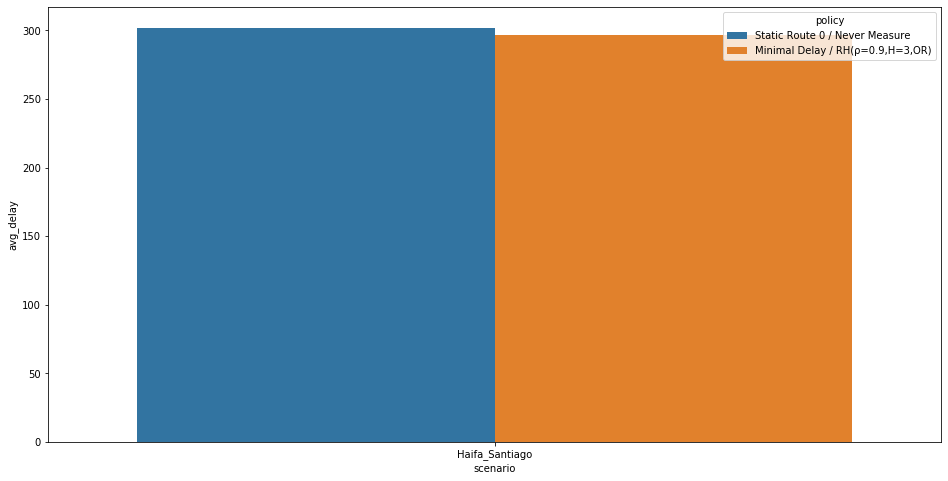

In [60]:
df = get_benchmark_df(benchmarks)
plt.figure(figsize=(16,8))
sns.barplot(x='scenario', y='avg_delay', hue='policy', data=df)
# plt.savefig('../figures/benchmark_delay_v2.png', bbox_inches='tight', dpi=300)

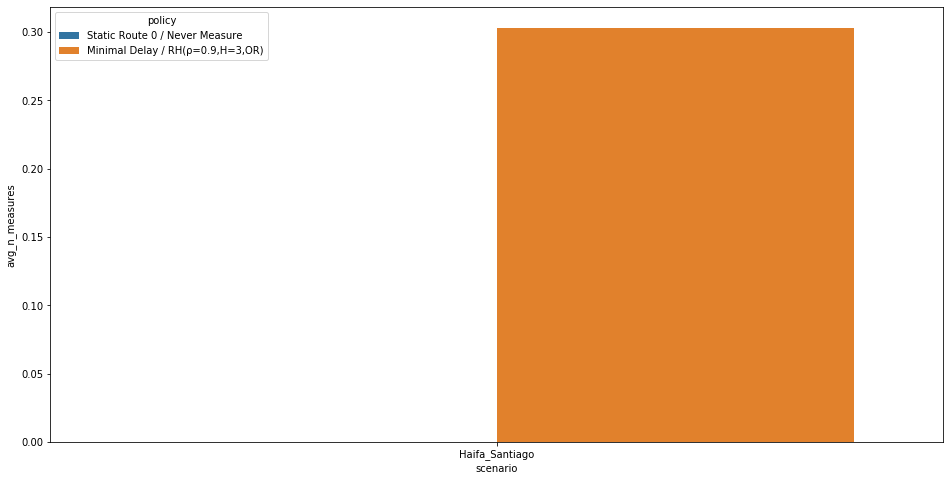

In [61]:
df = get_benchmark_df(benchmarks)
plt.figure(figsize=(16,8))
sns.barplot(x='scenario', y='avg_n_measures', hue='policy', data=df)
# plt.savefig('../figures/benchmark_cost_v2.png', bbox_inches='tight', dpi=300)

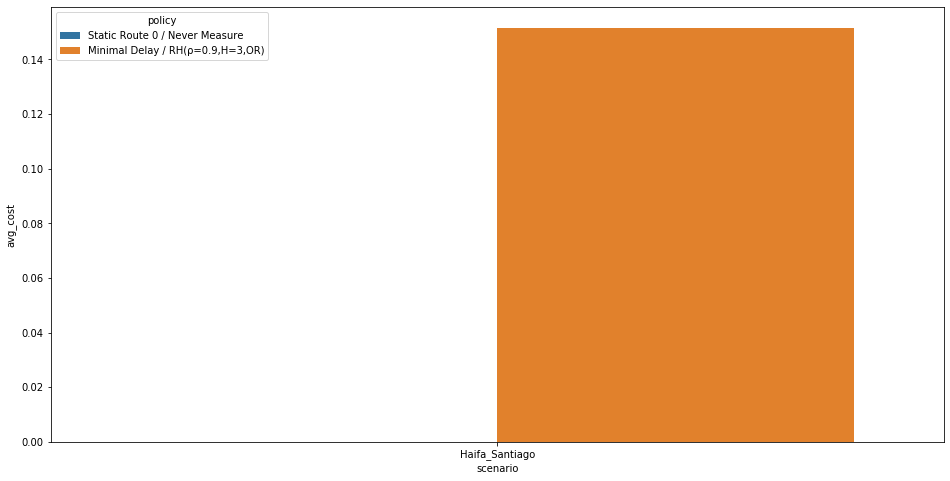

In [62]:
df = get_benchmark_df(benchmarks)
plt.figure(figsize=(16,8))
sns.barplot(x='scenario', y='avg_cost', hue='policy', data=df)
# plt.savefig('../figures/benchmark_cost_v2.png', bbox_inches='tight', dpi=300)

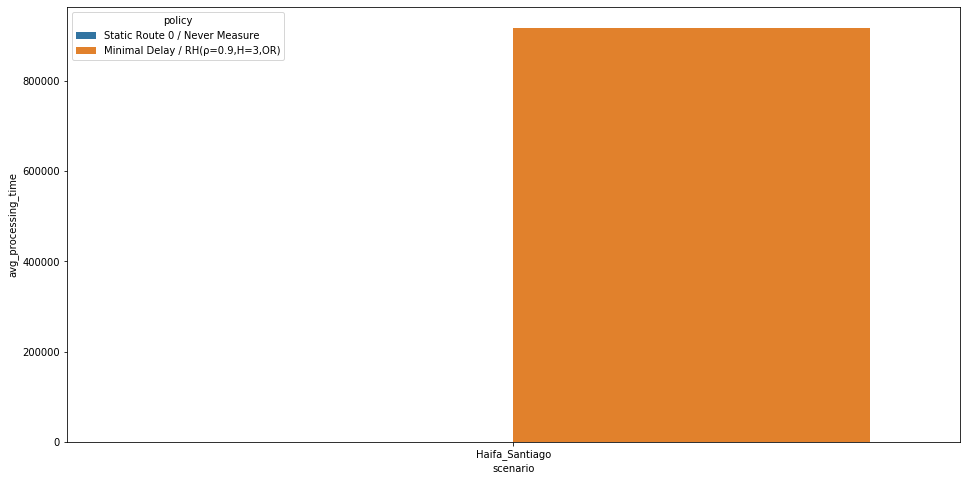

In [63]:
df = get_benchmark_df(benchmarks)
plt.figure(figsize=(16,8))
sns.barplot(x='scenario', y='avg_processing_time', hue='policy', data=df)
# plt.savefig('../figures/benchmark_acc_v2.png', bbox_inches='tight', dpi=300)